<font color="blue" size=10><center><u>The Sparks Foundation</center></u></font>

<font color = "blue" size=5><u>Intership Task :- 2 </u></font>

<font color= "blue" size=3>Prediction using UnSupervised ML</font>

1. From the given ‘Iris’ dataset, predict optimum number of clusters and represnt its visually.

# Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
%matplotlib inline

# Read Data Set

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()

In [10]:
df_iris = pd.DataFrame(iris.data, columns = iris.feature_names)
df_iris.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# KMeans Clustring

In [13]:
# Finding the optimum number of clusters for k-means classification
x = df_iris.iloc[:, [0, 1, 2, 3]].values

In [25]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

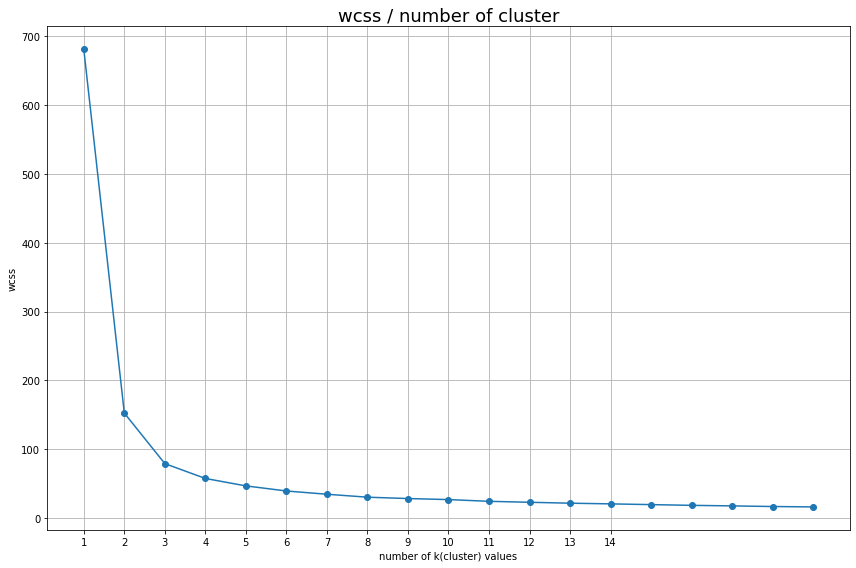

In [29]:
#elbow rule on plot    
plt.figure(figsize=(12,8))
plt.plot(range(1,20),wcss,"-o")
plt.title("wcss / number of cluster", fontsize=18)
plt.xlabel("number of k(cluster) values")
plt.xticks(range(1,15))
plt.grid(True)
plt.ylabel("wcss")
plt.tight_layout()
plt.show()

In [16]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

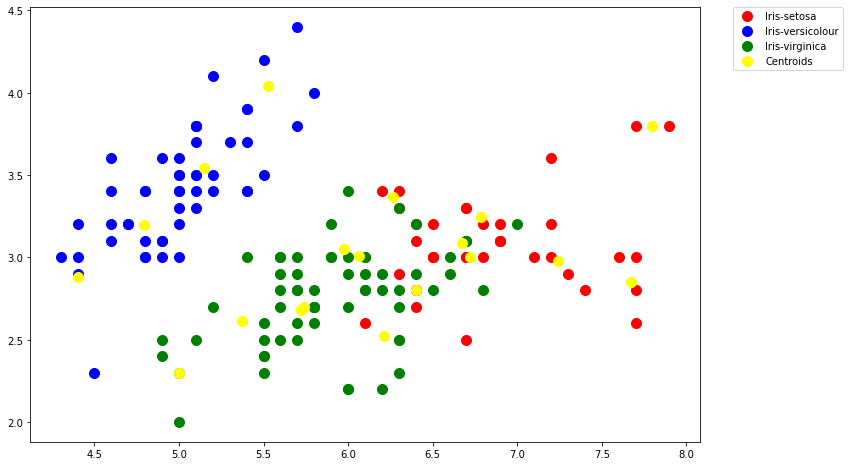

In [30]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(12,8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 100, c = 'yellow', label = 'Centroids')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

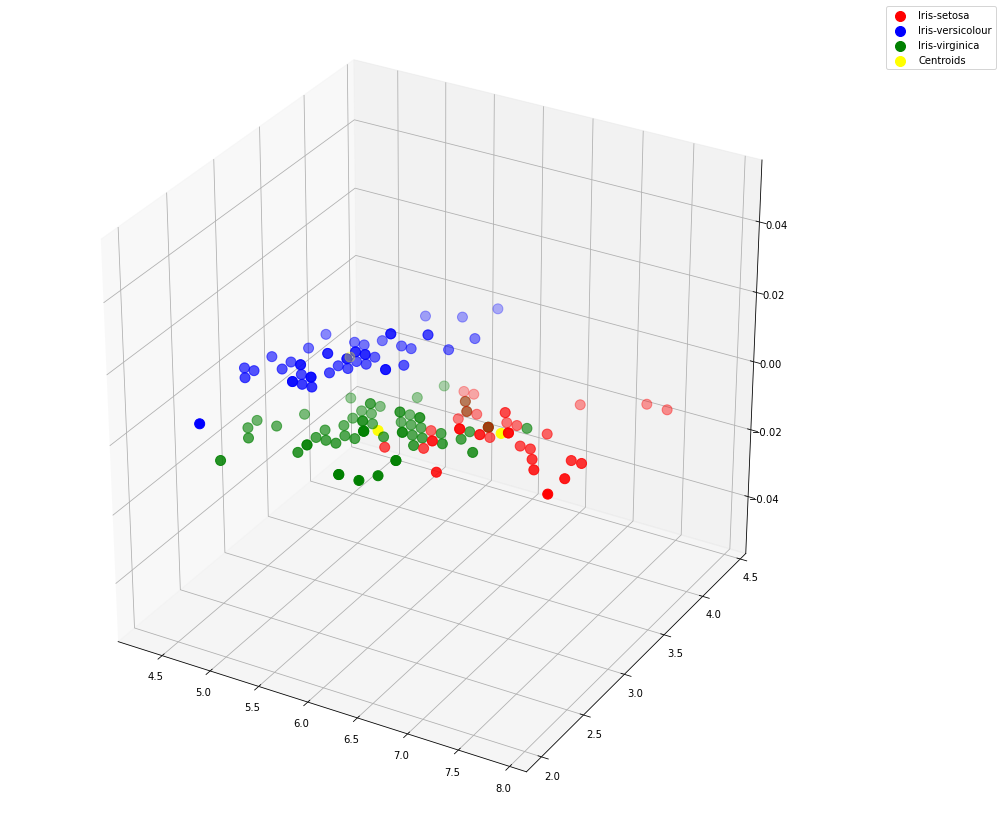

In [23]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()